# Keras Tutorial using Clothing Items
By:Becca Araya

# Loading the Data

In [12]:
%matplotlib inline
import sklearn
from keras.datasets import fashion_mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import to_categorical

In [2]:
#loading the data
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 6s 1us/step


In [4]:
print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

('Training data shape : ', (60000, 28, 28), (60000,))
('Testing data shape : ', (10000, 28, 28), (10000,))


In [5]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

('Total number of outputs : ', 10)
('Output classes : ', array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))


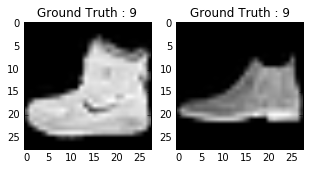

In [6]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Data Pre-Processing

In [8]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [10]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

('Original label:', 9)
('After conversion to one-hot:', array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))


In [14]:
from sklearn.cross_validation import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [15]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

# Model the Data

In [16]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [17]:
batch_size = 64
epochs = 20
num_classes = 10

In [18]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

In [19]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [20]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [21]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 199s 4ms/step - loss: 0.4643 - acc: 0.8307 - val_loss: 0.3193 - val_acc: 0.8848
Epoch 2/20
48000/48000 [==============================] - 216s 5ms/step - loss: 0.2887 - acc: 0.8938 - val_loss: 0.2758 - val_acc: 0.9004
Epoch 3/20
48000/48000 [==============================] - 195s 4ms/step - loss: 0.2399 - acc: 0.9121 - val_loss: 0.2683 - val_acc: 0.9002
Epoch 4/20
48000/48000 [==============================] - 190s 4ms/step - loss: 0.2083 - acc: 0.9241 - val_loss: 0.2436 - val_acc: 0.9127
Epoch 5/20
48000/48000 [==============================] - 193s 4ms/step - loss: 0.1829 - acc: 0.9327 - val_loss: 0.2234 - val_acc: 0.9202
Epoch 6/20
48000/48000 [==============================] - 195s 4ms/step - loss: 0.1581 - acc: 0.9409 - val_loss: 0.2244 - val_acc: 0.9217
Epoch 7/20
48000/48000 [==============================] - 211s 4ms/step - loss: 0.1389 - acc: 0.9477 - val_loss: 0.2325 - 

# Evaluation of Model

In [22]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)

In [23]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

('Test loss:', 0.45969710208978504)
('Test accuracy:', 0.9174)


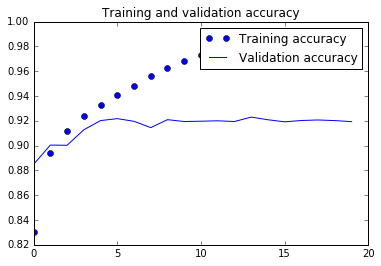

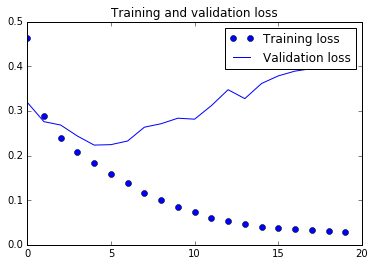

In [24]:
accuracy = fashion_train.history['acc']
val_accuracy = fashion_train.history['val_acc']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The network we have build up uses the following layers in order: convolution, max pooling, convolution, max pooling, convolution, max pooling, flatten, and a dense layer. The convolution layer checks for patterns in sections of the image (simply put). The max pooling layer takes the maximum pixel intensity in a subregion of the image. The flatten layer flattens the high-level features that are learned by convolutional layers and combining all the features. The dense layer is another name for a fully connected layer. 

We passed our input data into this network and we got about a 91% test accuracy; however during the fitting you can see we reached an accuracy of 99% during the last epoch. You can see in the top graph that in the beginning the validation accuracy kept increasing but became stagnant around epoch 5. In order to improve this, we can add a dropout layer.

# Adding dropout into the Network

In [25]:
batch_size = 64
epochs = 20
num_classes = 10

In [26]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))           
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [27]:
fashion_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [28]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [29]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 205s 4ms/step - loss: 0.6039 - acc: 0.7769 - val_loss: 0.4003 - val_acc: 0.8518
Epoch 2/20
48000/48000 [==============================] - 204s 4ms/step - loss: 0.3869 - acc: 0.8590 - val_loss: 0.3209 - val_acc: 0.8796
Epoch 3/20
48000/48000 [==============================] - 202s 4ms/step - loss: 0.3390 - acc: 0.8761 - val_loss: 0.2870 - val_acc: 0.8916
Epoch 4/20
48000/48000 [==============================] - 203s 4ms/step - loss: 0.3053 - acc: 0.8861 - val_loss: 0.2650 - val_acc: 0.9021
Epoch 5/20
48000/48000 [==============================] - 230s 5ms/step - loss: 0.2869 - acc: 0.8940 - val_loss: 0.2522 - val_acc: 0.9050
Epoch 6/20
48000/48000 [==============================] - 222s 5ms/step - loss: 0.2744 - acc: 0.8980 - val_loss: 0.2411 - val_acc: 0.9089
Epoch 7/20
48000/48000 [==============================] - 204s 4ms/step - loss: 0.2624 - acc: 0.9032 - val_loss: 0.2266 - 

# Evaluation of Model

In [30]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)

10000/10000 [==============================] - 12s 1ms/step


In [31]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

('Test loss:', 0.23222555005550385)
('Test accuracy:', 0.9206)


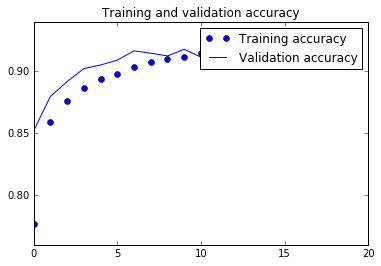

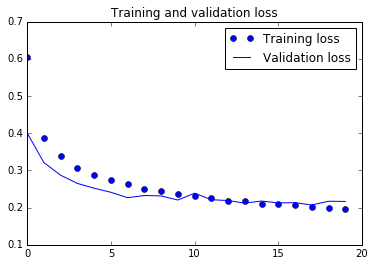

In [32]:
accuracy = fashion_train_dropout.history['acc']
val_accuracy = fashion_train_dropout.history['val_acc']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Predict Labels

In [33]:
predicted_classes = fashion_model.predict(test_X)

In [34]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [35]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9170 correct labels


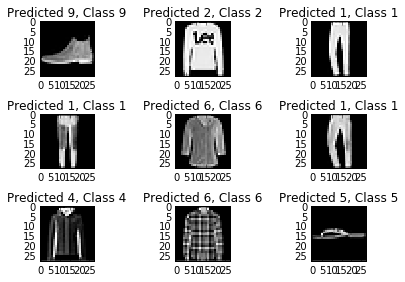

In [36]:
correct = np.where(predicted_classes==test_Y)[0]
print "Found %d correct labels" % len(correct)
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 830 incorrect labels


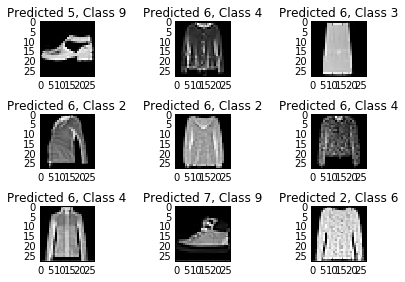

In [37]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print "Found %d incorrect labels" % len(incorrect)
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

# Classification Report

In [38]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.81      0.90      0.85      1000
    Class 1       0.99      0.98      0.99      1000
    Class 2       0.86      0.90      0.88      1000
    Class 3       0.90      0.93      0.91      1000
    Class 4       0.92      0.81      0.86      1000
    Class 5       0.99      0.98      0.99      1000
    Class 6       0.79      0.75      0.77      1000
    Class 7       0.95      0.98      0.97      1000
    Class 8       0.99      0.98      0.99      1000
    Class 9       0.98      0.96      0.97      1000

avg / total       0.92      0.92      0.92     10000



The new network we created here puts in some dropout layers. A dropout layer "randomly turns off a fraction of neurons during the training process, reducing the dependency on the training set by some amount" (taken from website). As you can see from the accuracy improved to 92%, but the more important improvement is the validation accuracy kept increasing and the validation loss kept decrasing through the epochs.

Another thing to note is the classification report. You can see the precision of identifying the images in the different classes. Class 5 and class 8 both have a precision of 99%, whereas class 6 is only at a 79%. In order to further improve the accuracy we would need to know exactly what is in class 6 and where the model is going wrong.